In [1]:
from ga_regression import *
from matplotlib import pyplot as plt
from functools import partial
import PIL
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from pvutils import iter_subplots
from pyvista import PolyData
import pyvista as pv
from scipy.stats import pearsonr

C:\Users\dg\.conda\envs\diffnet4\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# file = Path(r"D:\resynth\run_48_49\many_faces\2025-07-14-17-10-07\opts_and_metadata.pt")  # n_faces
# file = Path(r"D:\resynth\run_48_49\many_faces\2025-07-15-11-33-09\opts_and_metadata.pt")  # dropout
# file = Path(r"D:\resynth\run_48_49\many_faces\2025-07-16-08-02-15\opts_and_metadata.pt")  # spk window
# file = Path(r"D:\resynth\run_48_49\many_faces\2025-07-16-17-51-37\opts_and_metadata.pt")  # weights
# file = Path(r"D:\resynth\run_48_49\run00048_simp_vis_color\2025-07-17-11-30-50\opts_and_metadata.pt")  # visibility
# file = Path(r"D:\resynth\run_48_49\run00048_simp_vis_color\2025-07-18-09-35-43\opts_and_metadata.pt")  # color
# file = Path(r"D:\resynth\run_48_49\run00048_simp_vis_color\2025-07-20-09-36-32\opts_and_metadata.pt")  # vert norm
file = Path(r"D:\resynth\run_48_49\run00048_simp_vis_color\2025-07-21-09-26-35\opts_and_metadata.pt")  # n_blocks
# file = Path(r"D:\resynth\run_48_49\with_dirac_eigs\2025-07-25-11-03-27\opts_and_metadata.pt")  # dirac again


# file = Path(r"D:\resynth\run_09_10\run00009_resynth\2025-07-26-10-42-13\opts_and_metadata.pt")
file = Path(r"D:\resynth\run_09_10\run00009_resynth\2025-07-27-12-12-10\opts_and_metadata.pt")  # The augmentation

readers = Readers.from_file(file)

# to try:
# number of diffnet layers
# normalize verts?

In [3]:
readers.hparams

,log_folder,model_file,metadata_file,input_features,channel,k_eig,learning_rate,decay_every,decay_rate,n_blocks,dropout,n_faces,spike_window,weight_error,augment,use_visible,use_color,norm_verts,curr_learning_rate
0,D:\resynth\run_09_10\run00009_resynth\2025-07-...,D:\resynth\run_09_10\run00009_resynth\2025-07-...,D:\resynth\run_09_10\run00009_resynth\2025-07-...,xyz,"(29, 2, 19, 31, 0, 23, 12, 14, 18, 8)",128,0.001,50,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,0.000063
1,D:\resynth\run_09_10\run00009_resynth\2025-07-...,D:\resynth\run_09_10\run00009_resynth\2025-07-...,D:\resynth\run_09_10\run00009_resynth\2025-07-...,xyz,"(29, 2, 19, 31, 0, 23, 12, 14, 18, 8)",128,0.001,50,0.5,4,False,500,"(0.07, 0.75)",None,"AugmentMode(max_rotate=0.5235987755982988, max...",None,None,None,0.000063


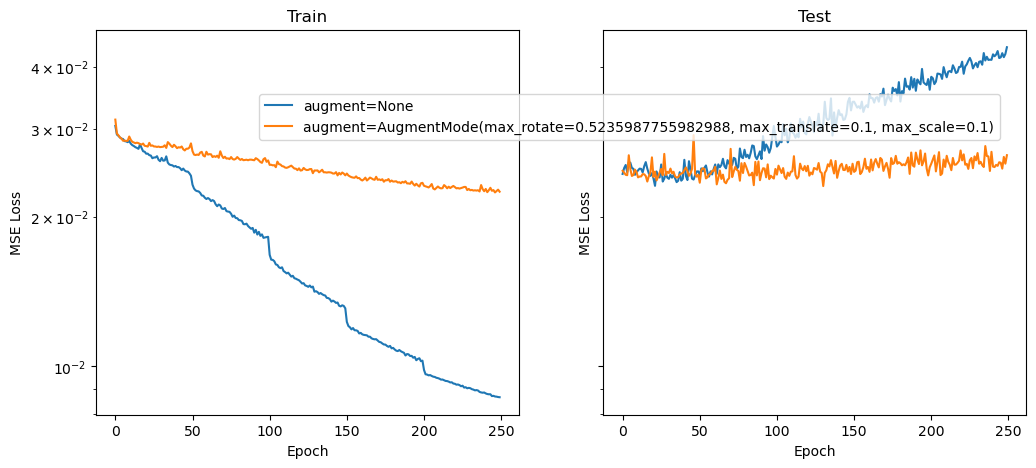

In [4]:
fig, axs = readers.plot_loss(legend=(.25, .7))

In [17]:
.5 / 6.2 * 360

29.032258064516128

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1268/1268 [00:34<00:00, 36.51it/s]


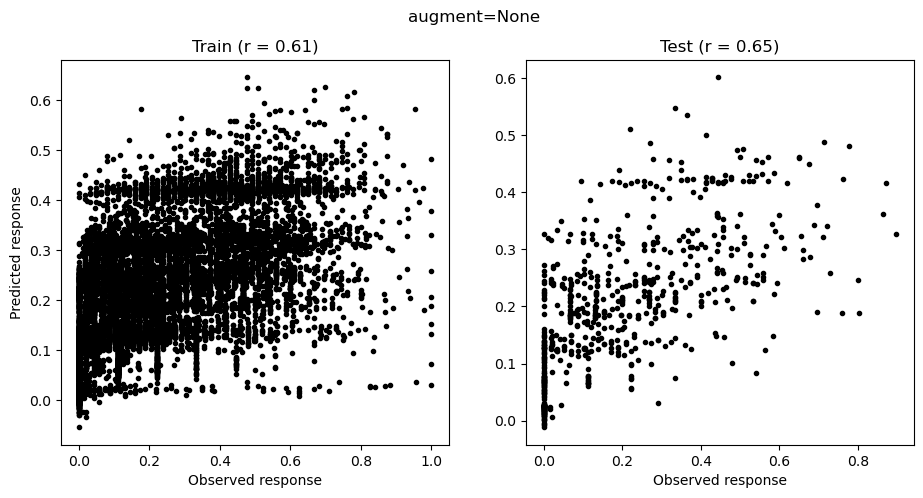

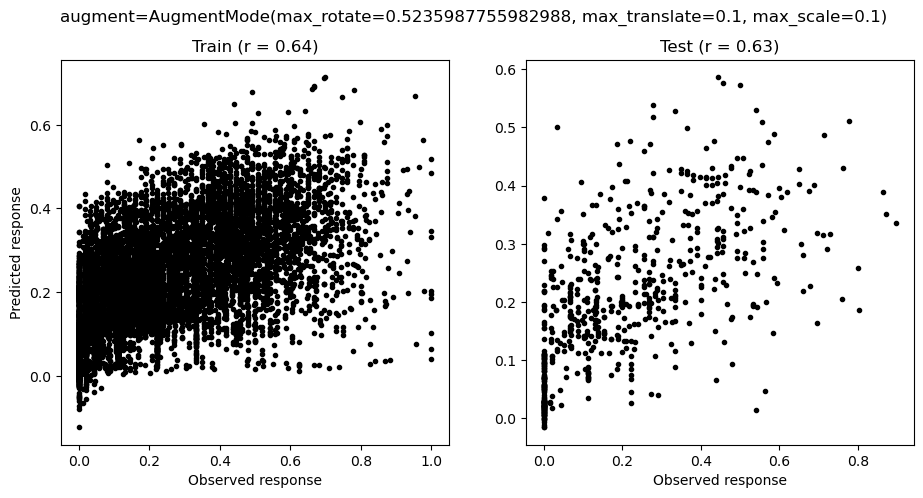

In [5]:
readers.scatter_plots(tags=None)

In [6]:
r = readers[0]

In [7]:
dataset, df, _ = r.metadata.load_dataset(weights=None)

In [8]:
md = next(iter(dataset))

In [9]:
verts = md.verts

origin0 = verts.mean(dim=0, keepdims=True)
verts = verts - origin0



In [10]:
from scipy.spatial.transform import Rotation

In [11]:
theta_max = np.pi / 8

# Rotation
axis = np.random.normal(size=3)
kx, ky, kz = axis / np.linalg.norm(axis)
theta = np.random.uniform(-theta_max, theta_max)
k = np.array([[0, -kz, ky], [kz, 0, -kx], [-ky, kx, 0]])
rot = np.eye(3) + np.sin(theta) * k + (1 - np.cos(theta)) * (k @ k)
verts = verts @ rot.T

In [12]:
# Scaling
max_scale = 0.1
scale = np.random.uniform(1 - max_scale, 1 + max_scale)
verts = verts * scale

In [13]:
# Translation
bbox_extent = torch.max(verts, dim=-2).values - torch.min(verts, dim=-2).values
bbox_extent

tensor([0.2452, 0.2643, 0.2322], dtype=torch.float64)

In [14]:
max_translate = 0.1


In [15]:
verts = verts + origin0